In [3]:
pip install pandas


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:

import pandas as pd


In [5]:
#step to data ingection
df =pd.read_csv('https://raw.githubusercontent.com/krishnaik06/FSDSRegression/refs/heads/main/notebooks/data/gemstone.csv')

In [6]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

No missing data in our data sheet

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


cut,colour,clarity  are the classification of the data this cartgorical data this is converted in to int data == data encoding, onehot encoding

In [8]:
#droping not imp colums
df =df.drop(labels=['id'],axis=1)

In [9]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [10]:
#checking for duplicated recordes
df.duplicated().sum()

np.int64(0)

In [11]:
#segrigating the numerical colums and cetegoical colums
numrical_colums = df.columns[df.dtypes!='object']
#segrigating the numerical colums and cetegoical colums
cate_colums = df.columns[df.dtypes=='object']

In [12]:
numrical_colums

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')

In [13]:
cate_colums

Index(['cut', 'color', 'clarity'], dtype='object')

In [14]:
df[cate_colums].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [15]:
df['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [16]:
df['color'].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [17]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
numrical_colums

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')

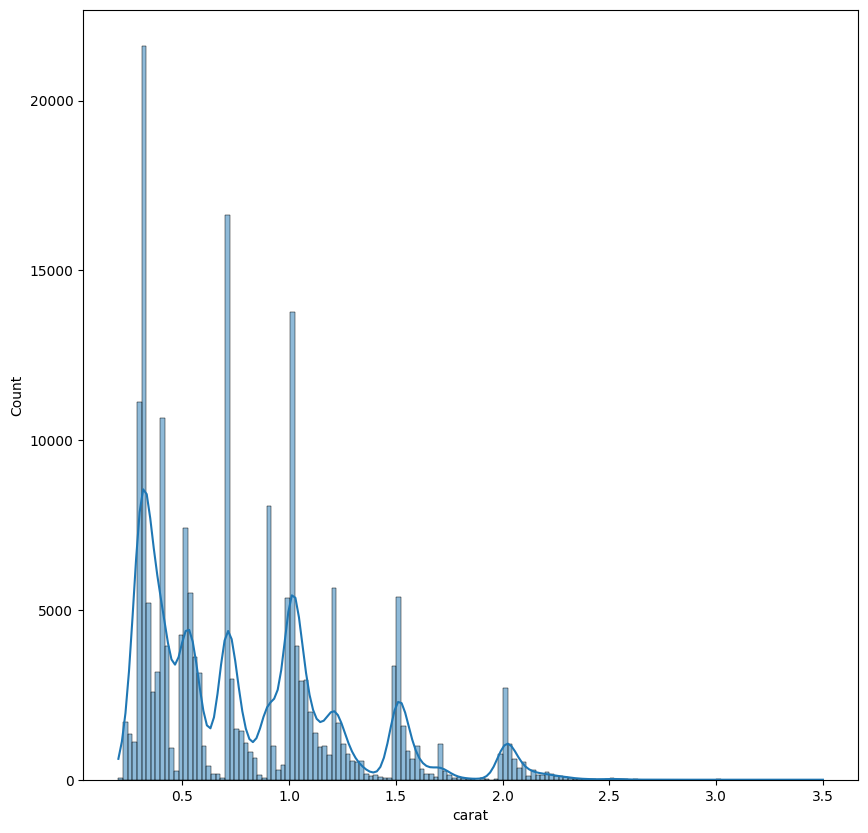

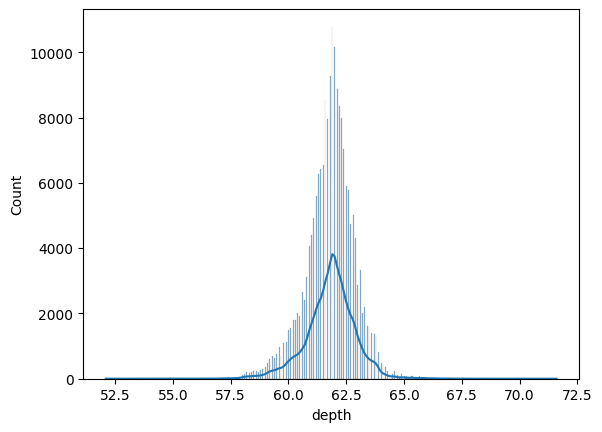

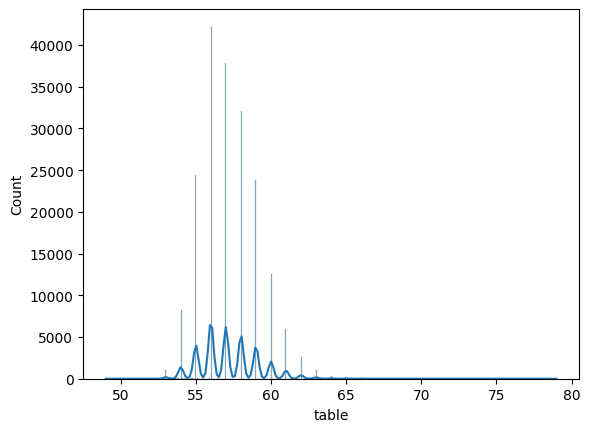

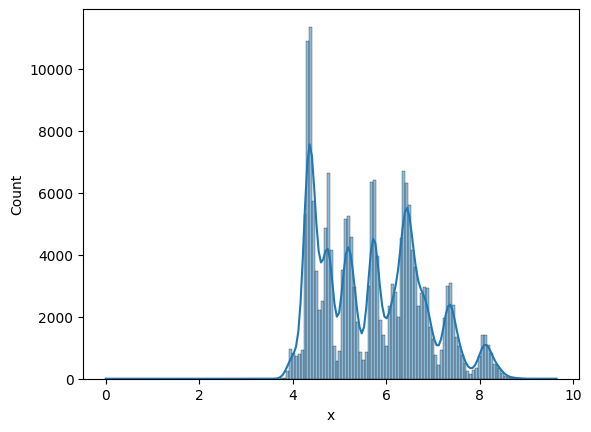

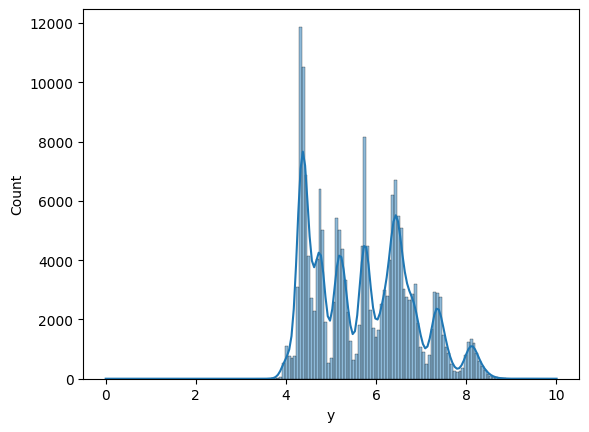

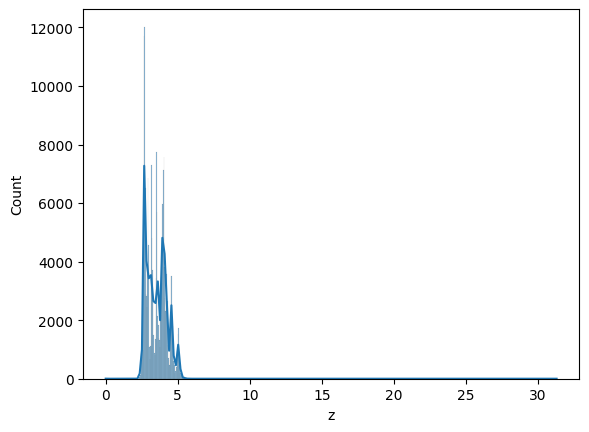

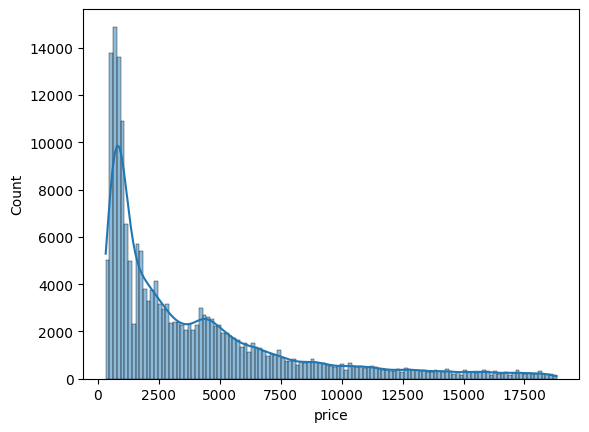

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
x=1
for i in numrical_colums:
    sns.histplot(data=df, x=i, kde = True)
    print('\n')
    plt.show()


In [20]:
sns.heatmap(df.corr(),annot=True)

ValueError: could not convert string to float: 'Premium'

In [ ]:
#

,carat,cut,color,clarity,depth,table,price
0,1.52,Premium,F,VS2,62.2,58.0,13619
1,2.03,Very Good,J,SI2,62.0,58.0,13387
2,0.70,Ideal,G,VS1,61.2,57.0,2772
3,0.32,Ideal,G,VS1,61.6,56.0,666
4,1.70,Premium,G,VS2,62.6,59.0,14453
...,...,...,...,...,...,...,...
193568,0.31,Ideal,D,VVS2,61.1,56.0,1130
193569,0.70,Premium,G,VVS2,60.3,58.0,2874
193570,0.73,Very Good,F,SI1,63.1,57.0,3036
193571,0.34,Very Good,D,SI1,62.9,55.0,681


Error in callback <function _draw_all_if_interactive at 0x000001C870057600> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

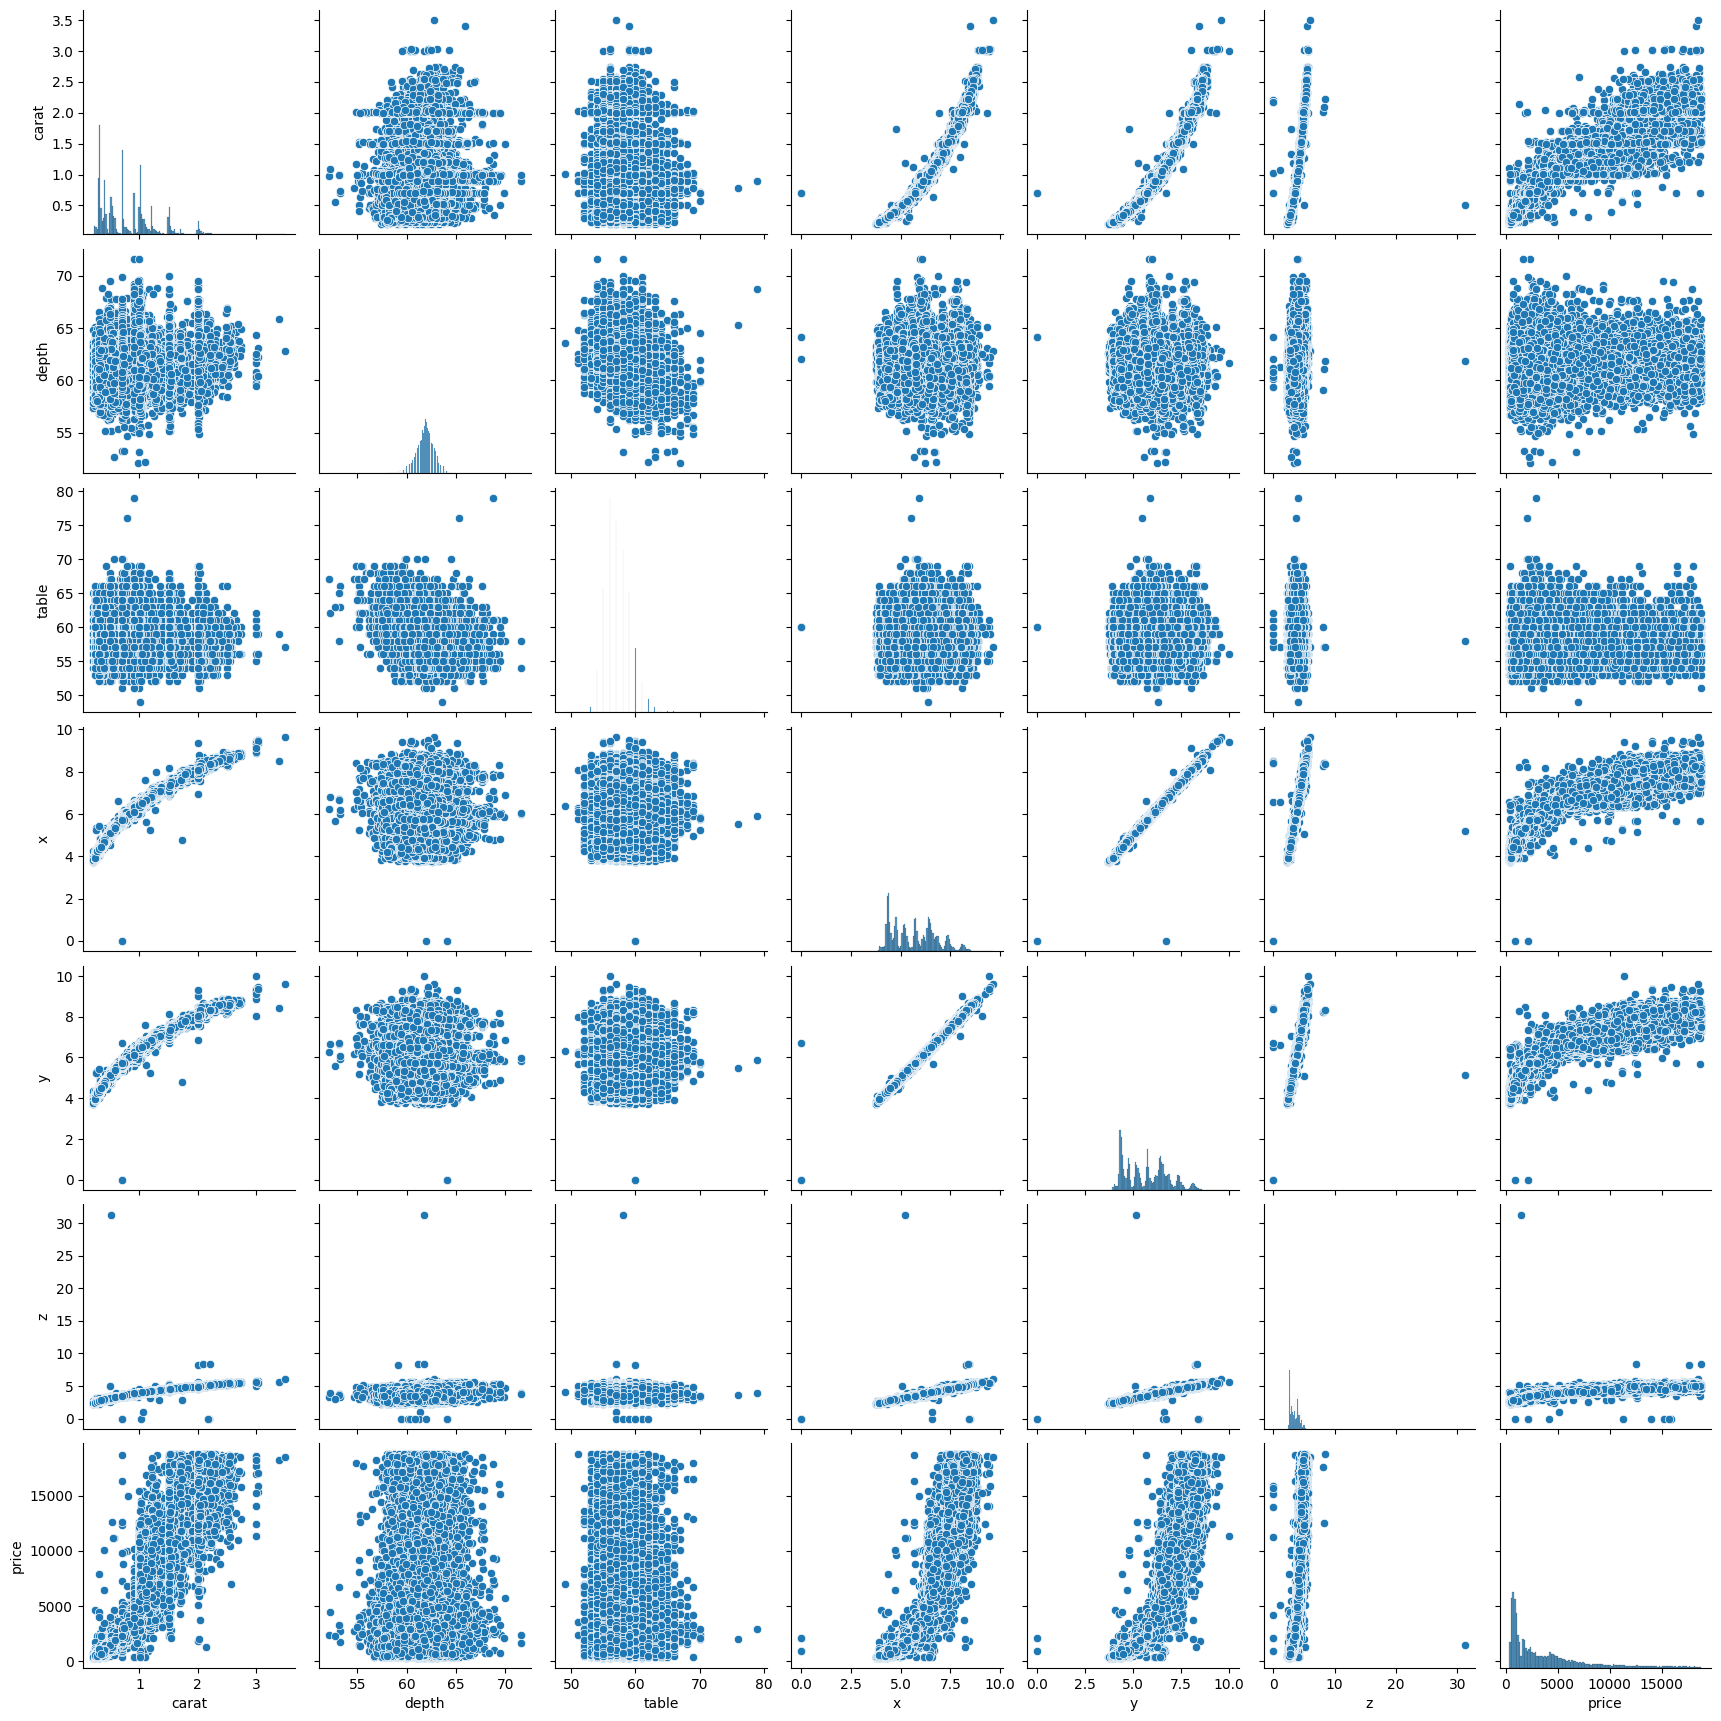

In [65]:
sns.pairplot(df)

In [1]:
df.head()

NameError: name 'df' is not defined